In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2

In [2]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

d = f(dt, t)

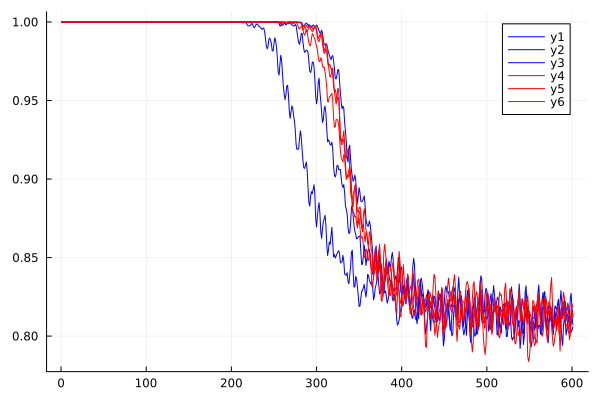

In [18]:
Mtrue = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\10000.jld2", "M")
solvers = [RadauIIA5 Rodas5]
m = [[320 640 5000], [320 640 1280]]
colors = [:Blue :Red]
p = plot()
for i = 1:2
    for k = m[i]
        str = string("Variables", "\\", "SolutionMatrices", "\\", solvers[i], "\\", k, ".jld2")
        Mest = FileIO.load(str, "M")
        C = CorrelationMatrix(Mest,Mtrue,1331,601)
        Cavg = sum(C,dims=1)/1331
        # push!(v,1-minimum(Cavg[1:n]))
        plot!(p,Cavg',color=colors[i])
    end
end
display(p)

In [3]:
Mtrue = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\10000.jld2", "M");

In [140]:
τ = 0.05
Mt=zeros(7,1331)
for solver = [RK4]
    for k = [1 2 3 4 5 6 7]
        str = string("Variables", "\\", "SolutionMatrices", "\\", solver, "\\", 10*2^(k-1), ".jld2")
        Mest = FileIO.load(str, "M")
        C = CorrelationMatrix(Mest,Mtrue,1331,601)
        for j = 1:1331
            for i = 1:601
                if 1-C[j,i]<=τ && Mt[k,j]<(i-1)*0.1
                    Mt[k,j] = (i-1)*0.1
                elseif 1-C[j,i]>τ
                    break
                end
            end
        end
    end
end

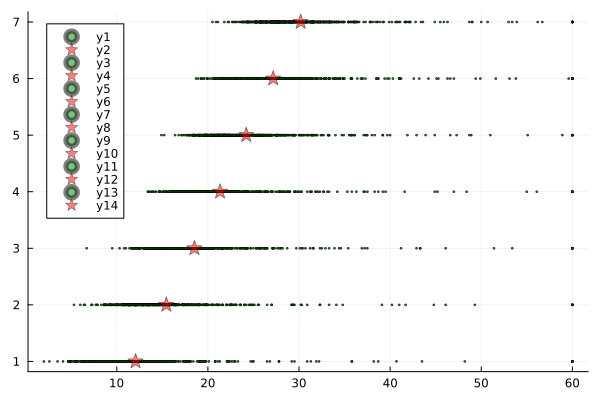

In [141]:
tavg = zeros(1,7)
p = plot()
for k = [1 2 3 4 5 6 7]
    tvec = Mt[k,:]
    y = ones(1, length(tvec))*k
    scatter!(p,tvec,y',m=(0.5, 1), color=:Green)

    avg=sum(tvec)/length(tvec)
    tavg[k] = avg
    scatter!(p,[avg],[k],m=(0.5,:star5,8),color=:Red)
end
display(p)

In [142]:
x = [0.1/10, 0.1/20, 0.1/40, 0.1/80, 0.1/160, 0.1/320, 0.1/640]
xlog = [log(a) for a in x]
A = zeros(7,2)
A[:,1] = xlog
A[:,2] = ones(7,1)
b = tavg'

c = A'A\A'*b

2×1 Matrix{Float64}:
 -4.303348562316783
 -7.4921346285367845

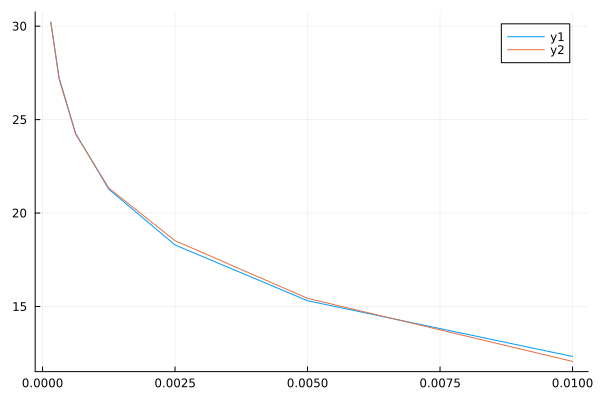

In [143]:
y = [c[1]*log(a)+c[2] for a in x]
p = plot()
plot!(p,x,y)
plot!(p,x,tavg')
display(p)

In [38]:

τvec = 0.001:0.001:0.005
cvec = zeros(2,length(τvec))

for l = 1:length(τvec)
    τ = τvec[l]
    Mt=zeros(7,1331)
    for solver = [RadauIIA5]
        for k = [1 2 3 4 5 6 7]
            str = string("Variables", "\\", "SolutionMatrices", "\\", solver, "\\", 10*2^(k-1), ".jld2")
            Mest = FileIO.load(str, "M")
            C = CorrelationMatrix(Mest,Mtrue,1331,601)
            for j = 1:1331
                for i = 1:601
                    if 1-C[j,i]<τ
                        Mt[k,j] = (i-1)*0.1
                    elseif
                        break
                    end
                end
            end
        end
    end

    tavg = zeros(1,7)
    for k = [1 2 3 4 5 6 7]
        tvec = Mt[k,:]
        avg=sum(tvec)/length(tvec)
        tavg[k] = avg
    end

    x = [0.1/10, 0.1/20, 0.1/40, 0.1/80, 0.1/160, 0.1/320, 0.1/640]
    xlog = [log(a) for a in x]
    A = zeros(7,2)
    A[:,1] = xlog
    A[:,2] = ones(7,1)
    b = tavg'

    c = A'A\A'*b
    cvec[:,l] = c

end

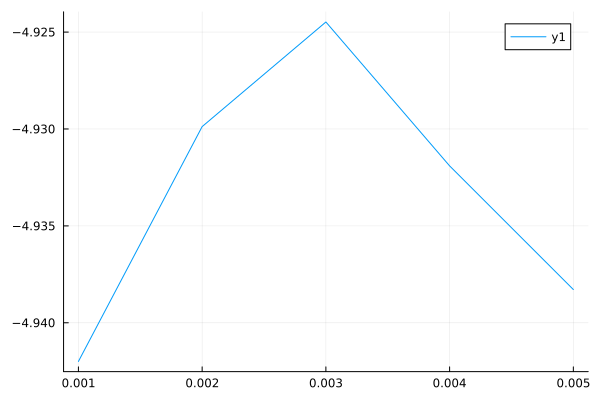

In [41]:
plot(τvec,cvec[1,:])

In [26]:
a = [1 2 3;3 4 1]
a

2×3 Matrix{Int64}:
 1  2  3
 3  4  1

1×3 Matrix{Int64}:
 4  6  4

In [105]:
τvec = 0.0001:0.01:0.1
cvec = zeros(2,length(τvec))

p = plot()
for l = 1:length(τvec)
    τ = τvec[l]
    tvec = zeros(7,1)
    for solver = [RadauIIA5]
        for k = [1 2 3 4 5 6 7]
            str = string("Variables", "\\", "SolutionMatrices", "\\", solver, "\\", 10*2^(k-1), ".jld2")
            Mest = FileIO.load(str, "M")
            C = CorrelationMatrix(Mest,Mtrue,1331,601)
            Cavg = sum(C, dims=1)/1331
            for i = 1:601
                if 1-Cavg[i]<τ
                    tvec[k] = (i-1)*0.1
                elseif 1-Cavg[i]>τ
                    break
                end
            end
        end
    end
    Δtvec = [0.1/10, 0.1/20, 0.1/40, 0.1/80, 0.1/160, 0.1/320, 0.1/640]
    Δtlog = [log(a) for a in Δtvec]
    plot!(p,Δtlog,tvec)
    A = zeros(7,2)
    A[:,1] = Δtlog
    A[:,2] = ones(7,1)
    b = tvec

    c = A'A\A'*b
    cvec[:,l] = c

end

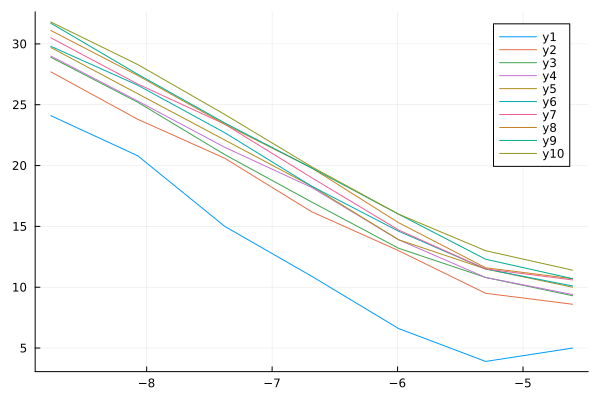

In [106]:
display(p)

In [107]:
Δtvec = [0.1/10, 0.1/20, 0.1/40, 0.1/80, 0.1/160, 0.1/320, 0.1/640, 0.1/1280, 0.1/2560, 0.1/5120, 0.1/10240]

11-element Vector{Float64}:
 0.01
 0.005
 0.0025
 0.00125
 0.000625
 0.0003125
 0.00015625
 7.8125e-5
 3.90625e-5
 1.953125e-5
 9.765625e-6

In [109]:
cvec

2×10 Matrix{Float64}:
  -5.12672   -4.81757   -4.91032  …   -5.19885   -5.19885   -5.15248
 -21.9416   -15.1464   -14.9236      -14.8523   -14.538    -13.7852

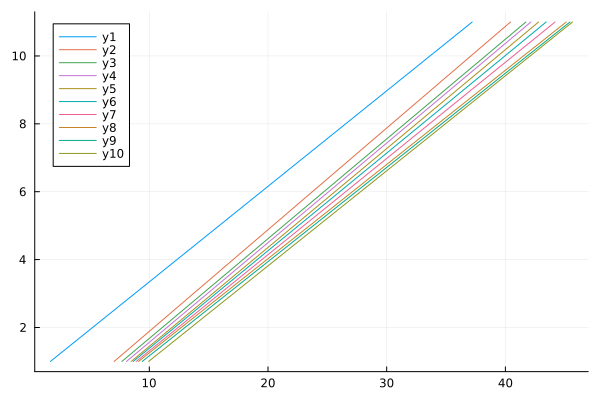

In [108]:
p = plot()
for i = 1:10
    c = cvec[:,i]
    y = [c[1]*log(a)+c[2] for a in Δtvec]
    plot!(p,y,1:11)
end
display(p)